<IPython.core.display.Javascript object>


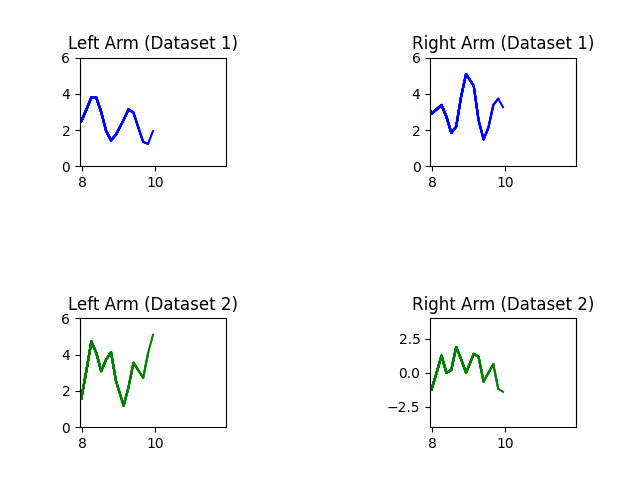

<IPython.core.display.Javascript object>


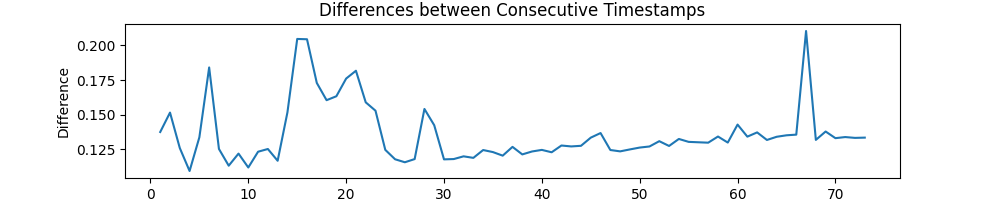

Differences between Consecutive Timestamps
Left Arm, Dataset 1
Mean: 0.13610820247702402
Median: 0.13017582893371582
Max: 0.21046090126037598
Min: 0.10945892333984375


In [74]:
# 4 plots: set 1 right, set 1 left, set 2 right, set 2 left
# plots updated during every iteration of loop

%matplotlib notebook
import time
from math import sin
from math import pi
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(331)
ax1.set_title('Left Arm (Dataset 1)')
#ax1.set_xlim(0,10)
ax1.set_ylim(0,6)
ax2 = fig.add_subplot(333)
ax2.set_title('Right Arm (Dataset 1)')
#ax2.set_xlim(0,10)
ax2.set_ylim(0,6)
ax3 = fig.add_subplot(337)
ax3.set_title('Left Arm (Dataset 2)')
#ax3.set_xlim(0,10)
ax3.set_ylim(0,6)
ax4 = fig.add_subplot(339)
ax4.set_title('Right Arm (Dataset 2)')
#ax4.set_xlim(0,10)
ax4.set_ylim(-4,4)
fig.show()

ni_fs = 10
period = 1.0 / ni_fs
i = 0
duration = 10

timestamps_left_1 = []
raw_sigs_left_1 = []
timestamps_right_1 = []
raw_sigs_right_1 = []

timestamps_left_2 = []
raw_sigs_left_2 = []
timestamps_right_2 = []
raw_sigs_right_2 = []

time_start = time.time()

# Generate and graph data in real time
while (time.time() - time_start < duration):
    now = time.time()
    
    # Dataset 1
    # Left Arm
    #raw_sig = 2 * sin(2 * pi * 1000 * (now - time_start))
    raw_sig = sin(2 * pi * 0.25 * i) + sin(2 * pi * 1.5 * i) + pi
    timestamps_left_1.append(now - time_start)
    raw_sigs_left_1.append(raw_sig)
    
    # Right Arm
    #raw_sig = 2 * sin(2 * pi * 1000 * (now - time_start) + 3.1415)
    raw_sig = sin(2 * pi * 2 * i) + sin(2 * pi * 1.25 * i) + pi
    timestamps_right_1.append(now - time_start)
    raw_sigs_right_1.append(raw_sig)
    
    # Dataset 2
    # Left Arm
    #raw_sig = 2 * sin(2 * pi * 1000 * (now - time_start)**2)
    raw_sig = sin(2 * pi * 2.5 * i) + sin(2 * pi * 1 * i) + pi
    timestamps_left_2.append(now - time_start)
    raw_sigs_left_2.append(raw_sig)
    
    # Right Arm
    #raw_sig = 2 * sin(2 * pi * 1000 * (now - time_start)**2 + 3.1415/2)
    raw_sig = sin(2 * pi * 3 * i) + sin(2 * pi * 0.5 * i)
    timestamps_right_2.append(now - time_start)
    raw_sigs_right_2.append(raw_sig)
    
    lower_xlim = max(0,timestamps_right_2[-1]-2)
    ax1.set_xlim(lower_xlim, lower_xlim+4)
    ax2.set_xlim(lower_xlim, lower_xlim+4)
    ax3.set_xlim(lower_xlim, lower_xlim+4)
    ax4.set_xlim(lower_xlim, lower_xlim+4)

    ax1.plot(timestamps_left_1, raw_sigs_left_1, color='b')
    ax2.plot(timestamps_right_1, raw_sigs_right_1, color='b')
    ax3.plot(timestamps_left_2, raw_sigs_left_2, color='g')
    ax4.plot(timestamps_right_2, raw_sigs_right_2, color='g')
    fig.canvas.draw()
    
    i += period
    
    
# Write data to files
with open('set_1_of_2_plots_updated_every_iteration.csv', 'w') as f:
    # Write left and right torque for dataset 1. Format: left torque, right torque, timestamp
    for i in range(0,len(timestamps_left_1)):
        print([raw_sigs_left_1[i], raw_sigs_right_1[i], timestamps_left_1[i]], file=f)
        
      
with open('set_2_of_2_plots_updated_every_iteration.csv', 'w') as f:
    # Write left and right torque for dataset 2. Format: left torque, right torque, timestamp
    for i in range(0,len(timestamps_left_2)):
        print([raw_sigs_left_2[i], raw_sigs_right_2[i], timestamps_left_2[i]], file=f)

# Timestamp Analysis
import numpy as np
fig = plt.figure(figsize=(10,2))
ax5 = fig.add_subplot(111)
diff_timestamps_left_1 = np.diff(np.abs(np.array(timestamps_left_1))) # difference between consecutive torque magnitudes
ax5.plot(np.arange(1,len(timestamps_left_1)), diff_timestamps_left_1)
ax5.set_title("Differences between Consecutive Timestamps") # between each i and i-1 in the timestamp array
ax5.set_ylabel("Difference")
ax5.set_xlabel("Timestamp")
print("Differences between Consecutive Timestamps")
print("Mean: " + str(np.mean(diff_timestamps_left_1)))
print("Median: " + str(np.median(diff_timestamps_left_1)))
print("Max: " + str(np.max(diff_timestamps_left_1)))
print("Min: " + str(np.min(diff_timestamps_left_1)))

<IPython.core.display.Javascript object>


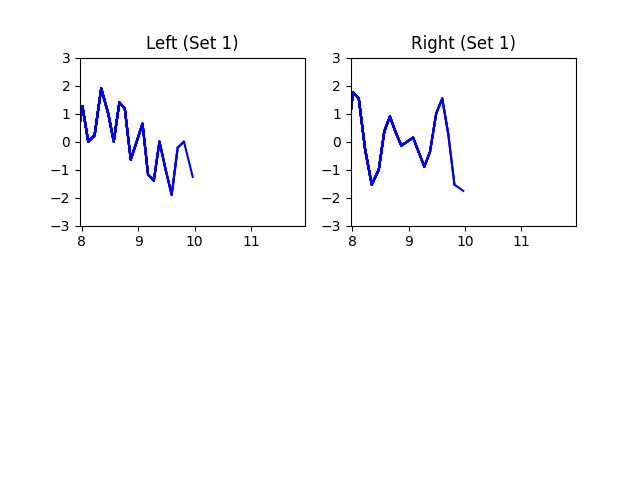

<IPython.core.display.Javascript object>


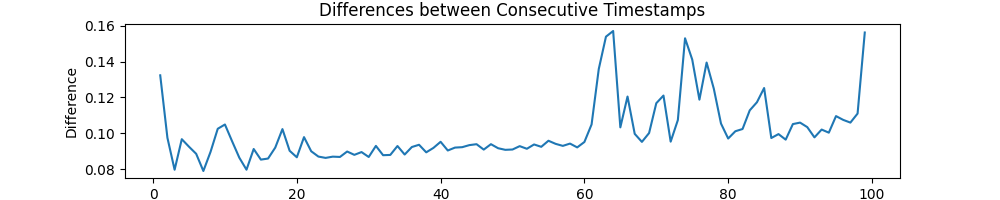

Differences between Consecutive Timestamps
Left Arm, Dataset 1
Mean: 0.10067963600158691
Median: 0.09519720077514648
Max: 0.1569821834564209
Min: 0.07905411720275879


In [75]:
# 2 plots: right and left
# plots updated during every iteration of loop
# With sliding window (x axis limits increase over time)

%matplotlib notebook
import time
from math import sin
from math import pi
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.set_title('Left (Set 1)')
#ax1.set_xlim(0,10)
ax1.set_ylim(-3,3)
ax2 = fig.add_subplot(222)
ax2.set_title('Right (Set 1)')
#ax2.set_xlim(0,10)
ax2.set_ylim(-3,3)
fig.show()

ni_fs = 10
duration = 10
period = 1.0 / ni_fs
i = 0

timestamps_left_1 = []
raw_sigs_left_1 = []
timestamps_right_1 = []
raw_sigs_right_1 = []

time_start = time.time()

# Generate and graph data in real time
while (time.time() - time_start < duration):
    now = time.time()
    
    # Dataset 1
    # Left Arm
    #raw_sig = 2 * sin(2 * 3.1415 * 1000 * (now - time_start))
    raw_sig = sin(2 * pi * 3 * i) + sin(2 * pi * 0.5 * i)
    timestamps_left_1.append(now - time_start)
    raw_sigs_left_1.append(raw_sig)
    
    # Right Arm
    #raw_sig = 2 * sin(2 * 3.1415 * 1000 * (now - time_start) + 3.1415)
    raw_sig = sin(2 * pi * 1.5 * i) + sin(2 * pi * 2 * i)
    timestamps_right_1.append(now - time_start)
    raw_sigs_right_1.append(raw_sig)
    
    lower_xlim = max(0,timestamps_left_1[-1]-2)
    ax1.set_xlim(lower_xlim, lower_xlim+4)
    #ax1.plot(timestamps_left_1, raw_sigs_left_1, color='b')
    
    #lower_xlim = max(0,timestamps_right_1[-1]-2)
    ax2.set_xlim(lower_xlim, lower_xlim+4)
    
    ax1.plot(timestamps_left_1, raw_sigs_left_1, color='b')
    ax2.plot(timestamps_right_1, raw_sigs_right_1, color='b')
    fig.canvas.draw()
    
    i += period
    
    
# Write data to files
with open('set_1_of_1_plots_updated_every_iteration.csv', 'w') as f:
    # Write left and right torque for dataset 1. Format: left torque, right torque, timestamp
    for i in range(0,len(timestamps_left_1)):
        print([raw_sigs_left_1[i], raw_sigs_right_1[i], timestamps_left_1[i]], file=f)
        
# Timestamp Analysis
import numpy as np
fig = plt.figure(figsize=(10,2))
ax5 = fig.add_subplot(111)
diff_timestamps_left_1 = np.diff(np.abs(np.array(timestamps_left_1))) # difference between consecutive torque magnitudes
ax5.plot(np.arange(1,len(timestamps_left_1)), diff_timestamps_left_1)
ax5.set_title("Differences between Consecutive Timestamps") # between each i and i-1 in the timestamp array
ax5.set_ylabel("Difference")
ax5.set_xlabel("Timestamp")
print("Differences between Consecutive Timestamps")
print("Mean: " + str(np.mean(diff_timestamps_left_1)))
print("Median: " + str(np.median(diff_timestamps_left_1)))
print("Max: " + str(np.max(diff_timestamps_left_1)))
print("Min: " + str(np.min(diff_timestamps_left_1)))


<IPython.core.display.Javascript object>


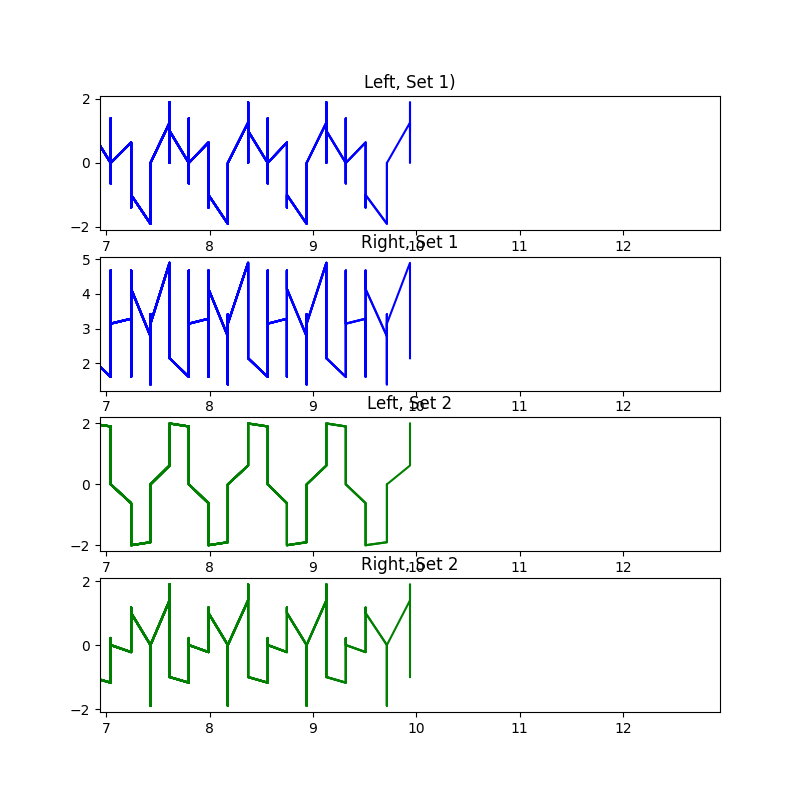

<IPython.core.display.Javascript object>


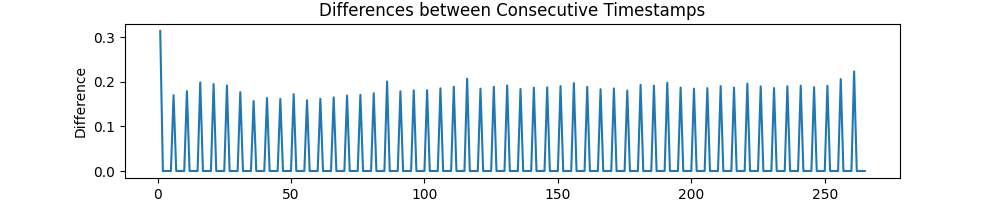

Differences between Consecutive Timestamps
Left Arm, Dataset 1
Mean: 0.03750243456858509
Median: 5.245208740234375e-06
Max: 0.31413698196411133
Min: 2.86102294921875e-06


In [77]:
# 4 plots: set 1 right, set 1 left, set 2 right, set 2 left
# plots updated during every 5 iterations of loop

%matplotlib notebook
import time
from math import sin
from math import pi
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(411)
ax1.set_title('Left, Set 1)')
ax1.set_xlim(0,10)
#ax1.set_ylim(-3,3)
ax2 = fig.add_subplot(412)
ax2.set_title('Right, Set 1')
ax2.set_xlim(0,10)
#ax2.set_ylim(-3,3)
ax3 = fig.add_subplot(413)
ax3.set_title('Left, Set 2')
ax3.set_xlim(0,10)
#ax3.set_ylim(-3,3)
ax4 = fig.add_subplot(414)
ax4.set_title('Right, Set 2')
ax4.set_xlim(0,10)
#ax4.set_ylim(-3,3)
fig.show()

ni_fs = 10
duration = 10
period = 1.0 / ni_fs
i = 0

timestamps_left_1 = []
raw_sigs_left_1 = []
timestamps_right_1 = []
raw_sigs_right_1 = []

timestamps_left_2 = []
raw_sigs_left_2 = []
timestamps_right_2 = []
raw_sigs_right_2 = []

time_start = time.time()
count = 0

# Generate and graph data in real time
while (time.time() - time_start < duration):
    now = time.time()
    
    # Dataset 1
    # Left Arm
    #raw_sig = 2 * sin(2 * pi * 1000 * (now - time_start))
    raw_sig = sin(2 * pi * 3 * i) + sin(2 * pi * 0.5 * i)
    timestamps_left_1.append(now - time_start)
    raw_sigs_left_1.append(raw_sig)
    
    # Right Arm
    #raw_sig = 2 * sin(2 * pi * 1000 * (now - time_start) + 3.1415) 
    raw_sig = sin(2 * pi * 3 * i) + sin(2 * pi * 1.5 * i) + pi
    timestamps_right_1.append(now - time_start)
    raw_sigs_right_1.append(raw_sig)
    
    # Dataset 2
    # Left Arm
    #raw_sig = 2 * sin(2 * pi * 1000 * (now - time_start)**2)
    raw_sig = sin(2 * pi * 0.5 * i) + sin(2 * pi * 0.5 * i)
    timestamps_left_2.append(now - time_start)
    raw_sigs_left_2.append(raw_sig)
    
    
    # Right Arm
    #raw_sig = 2 * sin(2 * pi * 1000 * (now - time_start)**2 + 3.1415/2)
    raw_sig = sin(2 * pi * 1.5 * i) + sin(2 * pi * 1 * i)
    timestamps_right_2.append(now - time_start)
    raw_sigs_right_2.append(raw_sig)
    
    if count % 5 == 0:
        lower_xlim = max(0,timestamps_right_2[-1]-3)
        ax1.set_xlim(lower_xlim, lower_xlim+6)
        ax2.set_xlim(lower_xlim, lower_xlim+6)
        ax3.set_xlim(lower_xlim, lower_xlim+6)
        ax4.set_xlim(lower_xlim, lower_xlim+6)
        ax1.plot(timestamps_left_1, raw_sigs_left_1, color='b')
        ax2.plot(timestamps_right_1, raw_sigs_right_1, color='b')
        ax3.plot(timestamps_left_2, raw_sigs_left_2, color='g')
        ax4.plot(timestamps_right_2, raw_sigs_right_2, color='g')
        fig.canvas.draw()

    count += 1
    i += period
    
    
# Write data to files
with open('set_1_of_2_plots_updated_every_5_iterations.csv', 'w') as f:
    # Write left and right torque for dataset 1. Format: left torque, right torque, timestamp
    for i in range(0,len(timestamps_left_1)):
        print([raw_sigs_left_1[i], raw_sigs_right_1[i], timestamps_left_1[i]], file=f)
        
      
with open('set_2_of_2_plots_updated_every_5_iterations.csv', 'w') as f:
    # Write left and right torque for dataset 2. Format: left torque, right torque, timestamp
    for i in range(0,len(timestamps_left_2)):
        print([raw_sigs_left_2[i], raw_sigs_right_2[i], timestamps_left_2[i]], file=f)
        

# Timestamp Analysis
import numpy as np
fig = plt.figure(figsize=(10,2))
ax5 = fig.add_subplot(111)
diff_timestamps_left_1 = np.diff(np.abs(np.array(timestamps_left_1))) # difference between consecutive torque magnitudes
ax5.plot(np.arange(1,len(timestamps_left_1)), diff_timestamps_left_1)
ax5.set_title("Differences between Consecutive Timestamps") # between each i and i-1 in the timestamp array
ax5.set_ylabel("Difference")
ax5.set_xlabel("Timestamp")
print("Differences between Consecutive Timestamps")
print("Mean: " + str(np.mean(diff_timestamps_left_1)))
print("Median: " + str(np.median(diff_timestamps_left_1)))
print("Max: " + str(np.max(diff_timestamps_left_1)))
print("Min: " + str(np.min(diff_timestamps_left_1)))

<IPython.core.display.Javascript object>


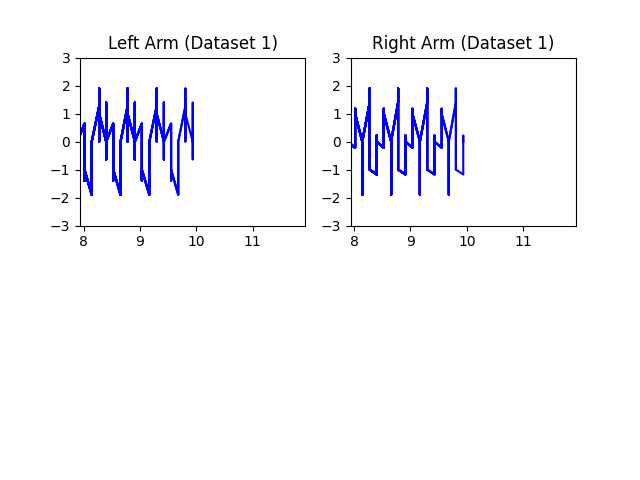

<IPython.core.display.Javascript object>


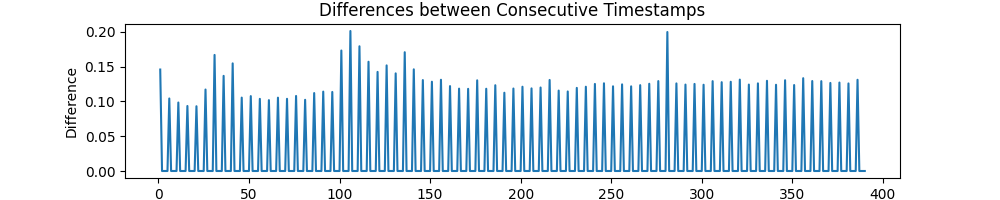

Differences between Consecutive Timestamps
Mean: 0.02547753101740128
Median: 3.4570693969726562e-06
Max: 0.20119333267211914
Min: 1.6689300537109375e-06


In [99]:
# 2 plots: set 1 right, set 1 left
# plots updated during every 5 iterations of loop

%matplotlib notebook
import time
from math import sin
from math import pi
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.set_title('Left Arm (Dataset 1)')
ax1.set_xlim(0,10)
ax1.set_ylim(-3,3)
ax2 = fig.add_subplot(222)
ax2.set_title('Right Arm (Dataset 1)')
ax2.set_xlim(0,10)
ax2.set_ylim(-3,3)
fig.show()

ni_fs = 10
duration = 10
period = 1.0 / ni_fs
i = 0

timestamps_left_1 = []
raw_sigs_left_1 = []
timestamps_right_1 = []
raw_sigs_right_1 = []

time_start = time.time()
count = 0

# Generate and graph data in real time
while (time.time() - time_start < duration):
    now = time.time()
    
    # Dataset 1
    # Left Arm
    #raw_sig = 2 * sin(2 * pi * 1000 * (now - time_start))
    raw_sig = sin(2 * pi * 3 * i) + sin(2 * pi * 0.5 * i)
    timestamps_left_1.append(now - time_start)
    raw_sigs_left_1.append(raw_sig)
    #lower_xlim = max(0,timestamps_left_1[-1]-2)
    #ax1.set_xlim(lower_xlim, lower_xlim+4)
    
    
    # Right Arm: Phase Shift
    #raw_sig = 2 * sin(2 * pi * 1000 * (now - time_start) + pi)
    raw_sig = sin(2 * np.pi * 1.5 * i) + sin(2 * pi * 1 * i)
    timestamps_right_1.append(now - time_start)
    raw_sigs_right_1.append(raw_sig)
    #lower_xlim = max(0,timestamps_right_1[-1]-2)
    #ax2.set_xlim(lower_xlim, lower_xlim+4)
    
    if count % 5 == 0:
        lower_xlim = max(0,timestamps_left_1[-1]-2)
        ax1.set_xlim(lower_xlim, lower_xlim+4)
        ax2.set_xlim(lower_xlim, lower_xlim+4)
        ax1.plot(timestamps_left_1, raw_sigs_left_1, color='b')
        ax2.plot(timestamps_right_1, raw_sigs_right_1, color='b')
        fig.canvas.draw()

    count += 1
    i += period
    
    
# Write data to files
with open('set_1_of_1_plot_updated_every_5_iterations.csv', 'w') as f:
    # Write left and right torque for dataset 1. Format: left torque, right torque, timestamp
    for i in range(0,len(timestamps_left_1)):
        print([raw_sigs_left_1[i], raw_sigs_right_1[i], timestamps_left_1[i]], file=f)
        
# Timestamp Analysis
import numpy as np
fig = plt.figure(figsize=(10,2))
ax5 = fig.add_subplot(111)
diff_timestamps_left_1 = np.diff(np.abs(np.array(timestamps_left_1))) # difference between consecutive torque magnitudes
ax5.plot(np.arange(1,len(timestamps_left_1)), diff_timestamps_left_1)
ax5.set_title("Differences between Consecutive Timestamps") # between each i and i-1 in the timestamp array
ax5.set_ylabel("Difference")
ax5.set_xlabel("Timestamp")
print("Differences between Consecutive Timestamps")
print("Mean: " + str(np.mean(diff_timestamps_left_1)))
print("Median: " + str(np.median(diff_timestamps_left_1)))
print("Max: " + str(np.max(diff_timestamps_left_1)))
print("Min: " + str(np.min(diff_timestamps_left_1)))

<IPython.core.display.Javascript object>


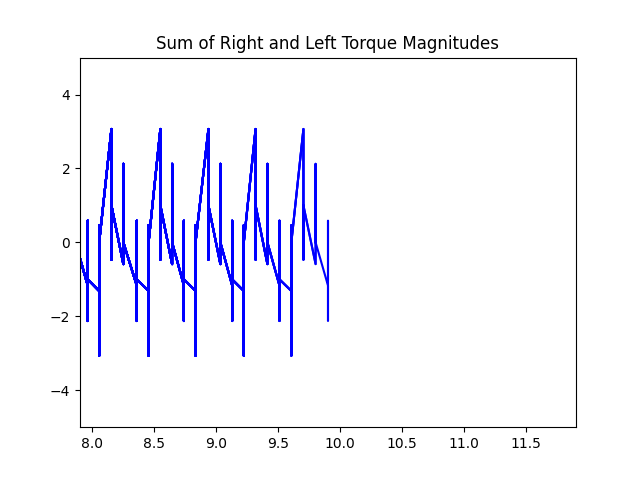

<IPython.core.display.Javascript object>


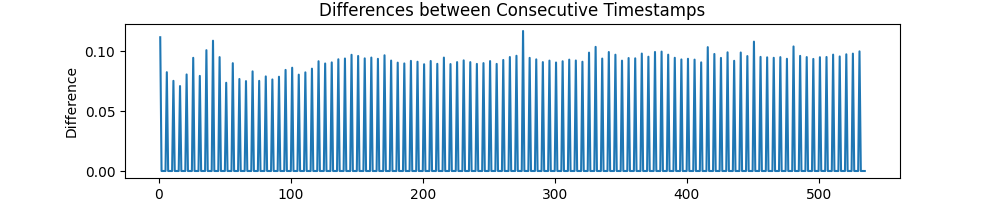

Differences between Consecutive Timestamps
Mean: 0.018507398177530165
Median: 4.0531158447265625e-06
Max: 0.11697626113891602
Min: 1.6689300537109375e-06


In [97]:
# 1 plot: sum of right and left torque magnitudes
# plot updated during every 5 iterations of loop

%matplotlib notebook
import time
from math import sin
from math import pi
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Sum of Right and Left Torque Magnitudes')
ax1.set_xlim(0,10)
ax1.set_ylim(-5,5)
fig.show()

ni_fs = 10
duration = 10
period = 1.0 / ni_fs
i = 0

timestamps_left_1 = []
raw_sigs_left_1 = []
timestamps_right_1 = []
raw_sigs_right_1 = []
torque_sums = []

time_start = time.time()
count = 0

# Generate and graph data in real time
while (time.time() - time_start < duration):
    now = time.time()
    
    # Dataset 1
    # Left Arm
    #raw_sig_left = 2 * sin(2 * pi * 1000 * (now - time_start))
    raw_sig_left = sin(2 * pi * 3 * i) + sin(2 * pi * 0.5 * i)
    timestamps_left_1.append(now - time_start)
    raw_sigs_left_1.append(raw_sig_left)
    
    
    # Right Arm:
    #raw_sig_right = 2 * sin(2 * pi * 1000 * (now - time_start) + pi/2)
    raw_sig_right = sin(2 * pi * 2.5 * i) + sin(2 * pi * 1.5 * i)
    timestamps_right_1.append(now - time_start)
    raw_sigs_right_1.append(raw_sig_right)
    
    torque_sums.append(raw_sig_left + raw_sig_right)
    
    if count % 5 == 0:
        ax1.plot(timestamps_right_1, torque_sums, color='b')
        lower_xlim = max(0,timestamps_left_1[-1]-2)
        ax1.set_xlim(lower_xlim, lower_xlim+4)
        fig.canvas.draw()
    
    count += 1
    i += period
    
    
# Write data to files
with open('torque_sums_updated_every_5_iterations.csv', 'w') as f:
    # Write left and right torque for dataset 1. Format: left torque, right torque, timestamp
    for i in range(0,len(timestamps_left_1)):
        print([raw_sigs_left_1[i], raw_sigs_right_1[i], timestamps_left_1[i]], file=f)
        
# Timestamp Analysis
import numpy as np
fig = plt.figure(figsize=(10,2))
ax5 = fig.add_subplot(111)
diff_timestamps_left_1 = np.diff(np.abs(np.array(timestamps_left_1))) # difference between consecutive torque magnitudes
ax5.plot(np.arange(1,len(timestamps_left_1)), diff_timestamps_left_1)
ax5.set_title("Differences between Consecutive Timestamps") # between each i and i-1 in the timestamp array
ax5.set_ylabel("Difference")
ax5.set_xlabel("Timestamp")
print("Differences between Consecutive Timestamps")
print("Mean: " + str(np.mean(diff_timestamps_left_1)))
print("Median: " + str(np.median(diff_timestamps_left_1)))
print("Max: " + str(np.max(diff_timestamps_left_1)))
print("Min: " + str(np.min(diff_timestamps_left_1)))

<IPython.core.display.Javascript object>


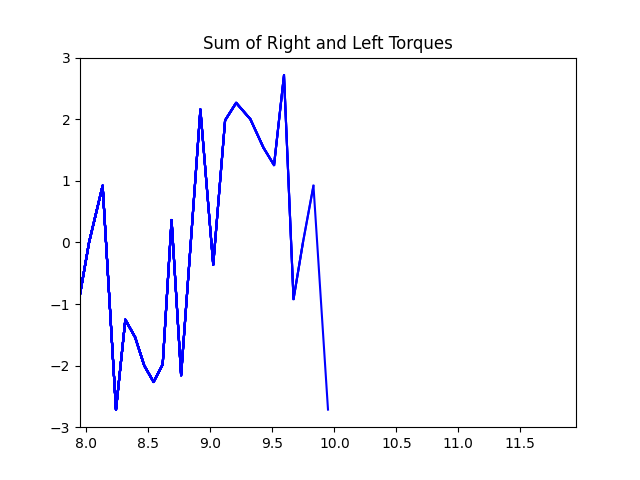

<IPython.core.display.Javascript object>


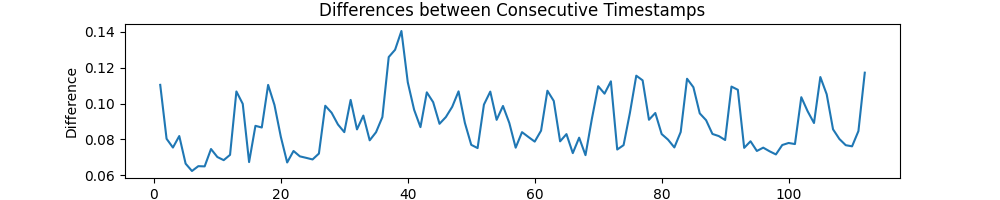

Differences between Consecutive Timestamps
Mean: 0.08882547276360649
Median: 0.08524727821350098
Max: 0.14046382904052734
Min: 0.062399864196777344


In [95]:
# With sliding window (x axis limits increasing over time)
# 1 plot: torque sum of right and left
# plot updated during every iteration of loop

%matplotlib notebook
import time
from math import sin
from math import pi
#import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Sum of Right and Left Torques')
ax1.set_ylim(-3,3)
fig.show()

ni_fs = 10
duration = 10
period = 1.0 / ni_fs
i = 0

timestamps_left_1 = []
raw_sigs_left_1 = []
timestamps_right_1 = []
raw_sigs_right_1 = []
torque_sums = []

time_start = time.time()

# Generate and graph data in real time
while (time.time() - time_start < 10):
    now = time.time()
    
    # Dataset 1
    # Left Arm
    #raw_sig_left = 2 * sin(2 * pi * 1000 * (now - time_start))
    raw_sig_left = sin(2 * pi * 3 * i) + sin(2 * pi * 0.5 * i)
    timestamps_left_1.append(now - time_start)
    raw_sigs_left_1.append(raw_sig_left)
    
    
    # Right Arm: Phase Shift
    #raw_sig_right = 2 * sin(2 * pi * 1000 * (now - time_start) + pi/2)
    raw_sig_right = sin(2 * pi * 4 * i) + sin(2 * pi * 0.5 * i)
    timestamps_right_1.append(now - time_start)
    raw_sigs_right_1.append(raw_sig_right)
    
    torque_sums.append(raw_sig_left + raw_sig_right)
    
    ax1.plot(timestamps_right_1, torque_sums, color='b')
    lower_xlim = max(0,timestamps_right_1[-1]-2)
    ax1.set_xlim(lower_xlim, lower_xlim+4)
    fig.canvas.draw()
    
    i += period

# Write data to files
with open('torque_sums_updated_every_iteration.csv', 'w') as f:
    # Write left and right torque for dataset 1. Format: left torque, right torque, timestamp
    for i in range(0,len(timestamps_left_1)):
        print([raw_sigs_left_1[i], raw_sigs_right_1[i], timestamps_left_1[i]], file=f)
    
# Timestamp Analysis
import numpy as np
fig = plt.figure(figsize=(10,2))
ax5 = fig.add_subplot(111)
diff_timestamps_left_1 = np.diff(np.abs(np.array(timestamps_left_1))) # difference between consecutive torque magnitudes
ax5.plot(np.arange(1,len(timestamps_left_1)), diff_timestamps_left_1)
ax5.set_title("Differences between Consecutive Timestamps") # between each i and i-1 in the timestamp array
ax5.set_ylabel("Difference")
ax5.set_xlabel("Timestamp")
print("Differences between Consecutive Timestamps")
print("Mean: " + str(np.mean(diff_timestamps_left_1)))
print("Median: " + str(np.median(diff_timestamps_left_1)))
print("Max: " + str(np.max(diff_timestamps_left_1)))
print("Min: " + str(np.min(diff_timestamps_left_1)))

<IPython.core.display.Javascript object>


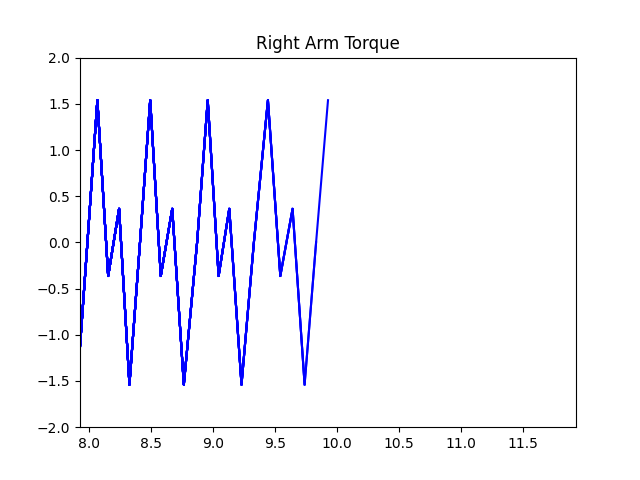

<IPython.core.display.Javascript object>


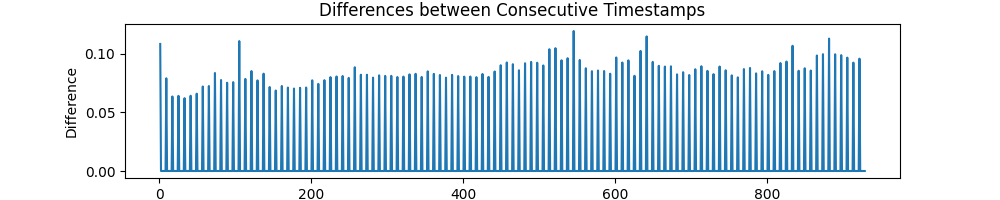

Differences between Consecutive Timestamps
Mean: 0.010697261783583411
Median: 2.1457672119140625e-06
Max: 0.11965394020080566
Min: 7.152557373046875e-07


In [116]:
# 1 point plotted every 8 iterations
# 1 plot: right arm torque
# With sliding window (x axis limits increasing over time)


%matplotlib notebook
import time
from math import sin
from math import pi
#import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Right Arm Torque')
ax1.set_ylim(-2,2)
fig.show()

ni_fs = 10
duration = 10
period = 1.0 / ni_fs
i = 0

timestamps_right_1 = []
raw_sigs_right_1 = []
torque_sums = []

timestamps_to_plot = []
torque_to_plot = []

time_start = time.time()
count = 0

# Generate and graph data in real time
while (time.time() - time_start < 10):
    now = time.time()
    current_time = now - time_start

    raw_sig_right = sin(2 * pi * 4 * i) + sin(2 * pi * 0.5 * i)
    timestamps_right_1.append(current_time)
    raw_sigs_right_1.append(raw_sig_right)
    
    if count % 8 == 0:
        timestamps_to_plot.append(current_time)
        torque_to_plot.append(raw_sig_right)
        ax1.plot(timestamps_to_plot, torque_to_plot, color='b')
        lower_xlim = max(0,timestamps_to_plot[-1]-2)
        ax1.set_xlim(lower_xlim, lower_xlim+4)
        fig.canvas.draw()
    
    i += period
    count += 1

# Write data to files
with open('right_torque_plot_updates_every_8_iterations.csv', 'w') as f:
    # Write left and right torque for dataset 1. Format: right torque, timestamp
    for i in range(0,len(timestamps_right_1)):
        print([raw_sigs_right_1[i], timestamps_right_1[i]], file=f)
    
# Timestamp Analysis
import numpy as np
fig = plt.figure(figsize=(10,2))
ax5 = fig.add_subplot(111)
diff_timestamps_right_1 = np.diff(np.abs(np.array(timestamps_right_1))) # difference between consecutive torque magnitudes
ax5.plot(np.arange(1,len(timestamps_right_1)), diff_timestamps_right_1)
ax5.set_title("Differences between Consecutive Timestamps") # between each i and i-1 in the timestamp array
ax5.set_ylabel("Difference")
ax5.set_xlabel("Timestamp")
print("Differences between Consecutive Timestamps")
print("Mean: " + str(np.mean(diff_timestamps_right_1)))
print("Median: " + str(np.median(diff_timestamps_right_1)))
print("Max: " + str(np.max(diff_timestamps_right_1)))
print("Min: " + str(np.min(diff_timestamps_right_1)))
#print(timestamps_to_plot)
#print(torque_to_plot)